In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.misc import derivative

In [14]:
x_v = np.array([0.35, 0.41, 0.47, 0.51, 0.56, 0.64])
y_v = np.array([2.73, 2.3, 1.96, 1.78, 1.59, 1.34])
n = len(x)-1
n

5

In [21]:
def f_lagranghe(x):
    ans = 0
    b = 1
    for i in range(len(x_v)):
        b = 1
        for j in range(len(x_v)):
            if i == j:
                b *= 1
            else:
                b *= (x-x_v[j])/(x_v[i] - x_v[j])
        ans += y_v[i] * b
    return ans
                
            
        
    

In [70]:
print(f_lagranghe(0.35))
print(f_lagranghe(0.436))

2.73
2.141108208471605


In [28]:
a1 = [0.35**st for st in range(len(x_v))]
a2 = [0.41**st for st in range(len(x_v))]
a3 = [0.47**st for st in range(len(x_v))]
a4 = [0.51**st for st in range(len(x_v))]
a5 = [0.56**st for st in range(len(x_v))]
a6 = [0.64**st for st in range(len(x_v))]

In [30]:
matrix = np.array([a1, a2, a3, a4, a5, a6])
matrix

array([[1.        , 0.35      , 0.1225    , 0.042875  , 0.01500625,
        0.00525219],
       [1.        , 0.41      , 0.1681    , 0.068921  , 0.02825761,
        0.01158562],
       [1.        , 0.47      , 0.2209    , 0.103823  , 0.04879681,
        0.0229345 ],
       [1.        , 0.51      , 0.2601    , 0.132651  , 0.06765201,
        0.03450253],
       [1.        , 0.56      , 0.3136    , 0.175616  , 0.09834496,
        0.05507318],
       [1.        , 0.64      , 0.4096    , 0.262144  , 0.16777216,
        0.10737418]])

In [39]:
a = np.linalg.inv(matrix)@y_v
a

array([   -5.65796731,   120.34167294,  -570.44744556,  1219.47910589,
       -1250.65434119,   500.8691906 ])

In [50]:
def poly(x):
    return sum(a[i]*x**i for i in range(len(a)))

In [69]:
print(poly(0.35))
print(poly(0.436))

2.7300000000056452
2.141108208479709


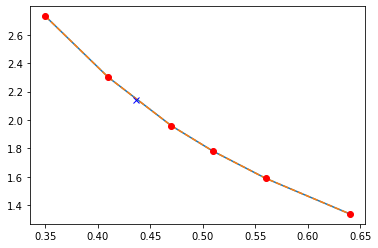

In [76]:

plt.plot(x_v, [poly(x) for x in x_v], '-',x_v,  [f_lagranghe(x) for x in x_v], '--', x_v, y_v,'ro',
         0.436, poly(0.436), 'bx')

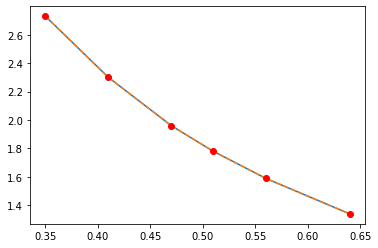

In [74]:
plt.plot(x_v, [poly(x) for x in x_v], '-',x_v,  [f_lagranghe(x) for x in x_v], '--', x_v, y_v,'ro')


In [91]:
new_x = np.arange(0,1,0.1)
new_y = np.array([poly(x) for x in new_x])
print(new_x)
print(new_y)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[-5.65796731  1.7711479   3.5075335   3.1170123   2.36592273  1.82216189
  1.45622857  1.24226629  1.75910632  4.79131072]


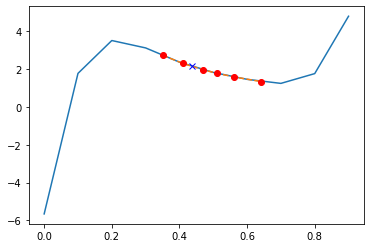

In [93]:
 
plt.plot(new_x, new_y,x_v, [poly(x) for x in x_v], '--', x_v, y_v,'ro',
         0.436, poly(0.436), 'bx') 
        
        

In [94]:
mx = np.array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46])
my = np.array([0.26, 0.27, 0.29, 0.3, 0.32, 0.33, 0.35, 0.36, 0.38, 0.39])

In [109]:
def coef(x, y):
    x.astype(float)
    y.astype(float)
    n = len(x)
    a = []
    for i in range(n):
        a.append(y[i])

    for j in range(1, n):

        for i in range(n-1, j-1, -1):
            a[i] = float(a[i]-a[i-1])/float(x[i]-x[i-j])

    return np.array(a) # return an array of coefficient

def Eval(a, x, r):
    x.astype(float)
    n = len( a ) - 1
    temp = a[n] + (r - x[n])
    for i in range( n - 1, -1, -1 ):
        temp = temp * ( r - x[i] ) + a[i]
    return temp # return the y_value interpolation

In [136]:
cf = coef(mx, my)
cf

array([ 2.60000000e-01,  2.00000000e-01,  2.00000000e+00, -2.66666667e+01,
        2.66666667e+02, -2.13333333e+03,  1.42222222e+04, -8.12698413e+04,
        4.06349206e+05, -1.80599647e+06])

In [141]:
ax = [0.11, 0.156,.026, 0.37, 0.4, 0.45]
print([Eval(cf, mx, x) for x in ax])

[0.29, 0.29827335902823615, 0.2195170794104946, 0.3595621091596448, 0.36892059496225843, 0.4270009387034319]


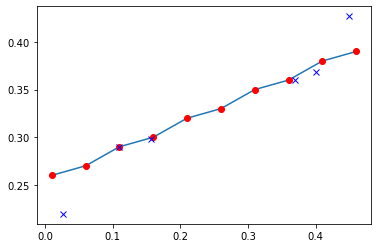

In [142]:
plt.plot(mx, [Eval(cf, mx, x) for x in mx], mx, my, 'ro', ax, [Eval(cf, mx, x) for x in ax], 'bx')